In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
age = pd.read_csv('age.csv')
liter = pd.read_csv('liter.csv')

In [3]:
age.head()

,Series Name,Series Code,Country Name,Country Code,2012 [YR2012],2013 [YR2013],Life expandency at birth (2014) / yrs,2015 [YR2015],2016 [YR2016],Unnamed: 9,Series Name.1,Series Code.1,Country Name.1,Country Code.1,2012 [YR2012].1,2013 [YR2013].1,GNI per capita (2014) / $,2015 [YR2015].1,2016 [YR2016].1
0,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Costa Rica,CRI,79.054512,79.231561,79.416854,79.608902,NaN,NaN,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Costa Rica,CRI,9210.0,9810.0,10200.0,10570.0,10840.0
1,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Lebanon,LBN,78.965415,79.150317,79.326268,79.498244,NaN,NaN,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Lebanon,LBN,8530.0,8450.0,8300.0,8050.0,7980.0
2,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Albania,ALB,77.448268,77.747098,77.998390,78.203146,NaN,NaN,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Albania,ALB,4360.0,4480.0,4440.0,4290.0,4180.0
3,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Panama,PAN,77.239049,77.432634,77.625439,77.817439,NaN,NaN,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Panama,PAN,9530.0,10510.0,11520.0,11730.0,12140.0
4,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Croatia,HRV,76.924390,77.126829,77.478049,77.275610,NaN,NaN,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Croatia,HRV,13460.0,13470.0,13150.0,12810.0,12140.0


In [4]:
#retrieve only needed information
age_data = age.iloc[:99,[3,6,16]]

In [5]:
liter.head()

,Series Name,Series Code,Country Name,Country Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],count 2012-2016,...,Unnamed: 13,GNI per capita,Series Code.1,Country Name.1,Country Code.1,2012 [YR2012].1,2013 [YR2013].1,GNI per capita (2014) / $,2015 [YR2015].1,2016 [YR2016].1
0,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Uzbekistan,UZB,NaN,99.99486,99.98055,99.98383,NaN,3,...,NaN,NaN,NY.GNP.PCAP.CD,Uzbekistan,UZB,1740.0,1970.0,2110.0,2170.0,2220.0
1,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Ukraine,UKR,99.97435,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NY.GNP.PCAP.CD,Ukraine,UKR,3500.0,3800.0,3560.0,2650.0,2310.0
2,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Azerbaijan,AZE,99.77577,99.78936,99.78899,99.78806,99.79006,5,...,NaN,NaN,NY.GNP.PCAP.CD,Azerbaijan,AZE,6480.0,7450.0,7700.0,6550.0,4760.0
3,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Georgia,GEO,NaN,NaN,99.58619,NaN,NaN,1,...,NaN,NaN,NY.GNP.PCAP.CD,Georgia,GEO,3870.0,4240.0,4490.0,4120.0,3830.0
4,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Moldova,MDA,99.13831,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NY.GNP.PCAP.CD,Moldova,MDA,2140.0,2470.0,2560.0,2230.0,2120.0


In [6]:
liter_data = liter.iloc[:49,[3,11]]

In [7]:
age_countries = age_data.iloc[:,0].as_matrix()
liter_countries = liter_data.iloc[:,0].as_matrix()

In [8]:
age_countries, liter_countries

(array(['CRI', 'LBN', 'ALB', 'PAN', 'HRV', 'MDV', 'MEX', 'MNE', 'BIH',
        'ARG', 'CHN', 'ECU', 'VNM', 'JAM', 'DZA', 'IRN', 'MKD', 'SRB',
        'TUN', 'MAR', 'TUR', 'LCA', 'MYS', 'ROU', 'BRA', 'THA', 'LKA',
        'NIC', 'WSM', 'PER', 'BGR', 'MUS', 'JOR', 'ARM', 'COL', 'DOM',
        'GRD', 'HND', 'PSE', 'BLR', 'VCT', 'PRY', 'GEO', 'GTM', 'SLV',
        'TON', 'CPV', 'BGD', 'VUT', 'AZE', 'KAZ', 'UKR', 'MDA', 'SUR',
        'EGY', 'XKX', 'UZB', 'TJK', 'RUS', 'KGZ', 'SLB', 'BLZ', 'FJI',
        'IRQ', 'BTN', 'FSM', 'MNG', 'PHL', 'IDN', 'BOL', 'TLS', 'KHM',
        'IND', 'TKM', 'GUY', 'STP', 'MMR', 'KEN', 'PAK', 'LAO', 'KIR',
        'PNG', 'GAB', 'BWA', 'YEM', 'SDN', 'COG', 'MRT', 'NAM', 'GHA',
        'ZAF', 'AGO', 'ZMB', 'GNQ', 'CMR', 'SWZ', 'LSO', 'CIV', 'NGA'], dtype=object),
 array(['UZB', 'UKR', 'AZE', 'GEO', 'MDA', 'SRB', 'MDV', 'ARG', 'JOR',
        'ALB', 'BIH', 'PSE', 'PHL', 'TUR', 'IDN', 'PRY', 'MEX', 'COL',
        'ZAF', 'PER', 'ECU', 'BOL', 'THA', 'SUR', 'MUS', 'BRA

In [9]:
#Find co-exist country 
co_countries = set(liter_countries) & set(age_countries)

In [10]:
len(co_countries)

47

In [11]:
#Search for the countries' index through the data
liter_picked = []
age_picked = []
test1 = liter_data.iloc[:,0]
test2 = age_data.iloc[:,0]
for con in co_countries:
    liter_picked.append(np.argwhere(liter_countries == con)[0,0])
    age_picked.append(np.argwhere(age_countries == con)[0,0])

In [12]:
age_picked

[52,
 74,
 11,
 90,
 91,
 15,
 49,
 82,
 78,
 46,
 24,
 75,
 18,
 51,
 20,
 76,
 53,
 96,
 64,
 6,
 69,
 34,
 2,
 67,
 63,
 35,
 37,
 47,
 41,
 42,
 17,
 9,
 31,
 44,
 97,
 29,
 38,
 25,
 54,
 19,
 56,
 5,
 68,
 8,
 77,
 32,
 43]

In [17]:
best_pair = []
x1_loop = np.arange(5,50,5)
x2_loop = np.arange(5,50,5)
best_rsq = 0
for i in x1_loop:
    for j in x2_loop:
        filter_age = age_data.iloc[age_picked]
        filter_liter = liter_data.iloc[liter_picked]
        temp = filter_liter.iloc[:,1].as_matrix()
        filter_age['liter_rate'] = temp
        filter_age.columns = ['code','x1','y','x2']
        filter_age["x2"] = np.exp((filter_age['x2']-100)/j)
        filter_age['x1'] = np.exp((filter_age['x1'] - 70)/i)
        model = ols("y ~ x1 + x2", filter_age).fit()
        rsq = model.rsquared
        if rsq > best_rsq:
            best_rsq = rsq
            best_pair = [i,j]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [18]:
filter_age = age_data.iloc[age_picked]
filter_liter = liter_data.iloc[liter_picked]
temp = filter_liter.iloc[:,1].as_matrix()
filter_age['liter_rate'] = temp
filter_age.columns = ['code','x1','y','x2']
filter_age["x2"] = np.exp((filter_age['x2']-100)/best_pair[1])
filter_age['x1'] = np.exp((filter_age['x1'] - 70)/best_pair[0])
model = ols("y ~ x1 + x2", filter_age).fit()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [20]:
best_pair

[5, 30]

In [19]:
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     8.399
Date:                Fri, 26 Jan 2018   Prob (F-statistic):           0.000814
Time:                        04:12:07   Log-Likelihood:                -437.08
No. Observations:                  47   AIC:                             880.2
Df Residuals:                      44   BIC:                             885.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1414.8359   1218.924      1.161      0.2

C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [20]:
X1, X2, Y = filter_age.iloc[:,[1,3,2]].as_matrix().T

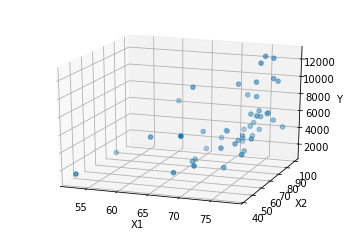

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(X1, X2, Y)
ax.view_init(20, -70)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()